# Plot Predictor Result Analysis

In [1]:
import pandas as pd
import numpy as np
from math import pi
from matplotlib.pyplot import figure
from matplotlib import pyplot as plt

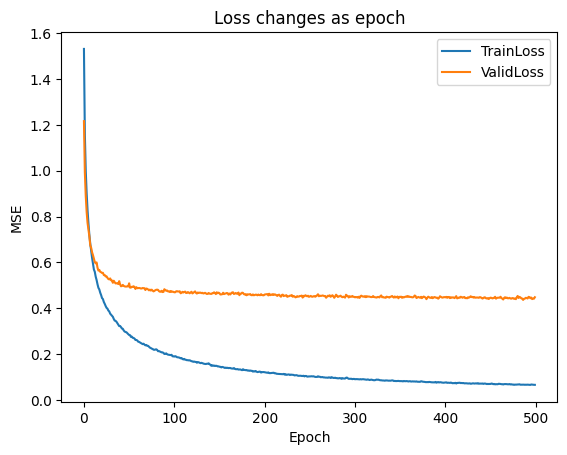

In [2]:
# Loss with Epoch
pre_file = "../predictor/saved_models/17_kinases/davis/DAT_best_davis_65smiles-random-5fold0.mse.ci"
con = pd.read_table(open(pre_file, 'r'), sep='\t', header=None)

x = list(range(int(len(con)/2)))
loss = con[2]
train_loss = []
test_loss = []
for i in range((int(len(con)/2))):
    train_loss.append(loss[2 * i])
    test_loss.append(loss[2 * i + 1])

fig = plt.figure()
ax = plt.subplot(111)
ax.set_title("Loss changes as epoch")
ax.set_xlabel("Epoch")
ax.set_ylabel("MSE")
ax.plot(x, train_loss, label='TrainLoss')
ax.plot(x, test_loss, label='ValidLoss')

ax.legend()
# plt.show()
plt.savefig('figure/loss.png')

In [3]:
five_fold_cv_file = "../predictor/saved_models/17_kinases/davis/DAT_best_davis_65smiles-random-5fold_test-set_ci-results.csv"
data_fold = pd.read_csv(five_fold_cv_file, sep=",", index_col=0)
data_fold

ALK      CDK2      CDK4      CDK6      CDK9      EGFR     LRRK2  \
0  0.813950  0.804900  0.832920  0.823370  0.692620  0.813350  0.774290   
1  0.812220  0.798940  0.829900  0.797950  0.714420  0.816420  0.773210   
2  0.818000  0.801200  0.834040  0.809740  0.714430  0.820340  0.776500   
3  0.804140  0.797130  0.826260  0.818100  0.706610  0.815820  0.774210   
4  0.810480  0.799310  0.836710  0.795970  0.709850  0.819590  0.751200   
5  0.811758  0.800296  0.831966  0.809026  0.707586  0.817104  0.769882   

     PIK3CA   PIK3CD    PIK3CG     ROCK1     ROCK2     BRAF  mTOR/FRAP  \
0  0.840640  0.85628  0.830060  0.808170  0.790490  0.81754   0.835150   
1  0.841490  0.84552  0.828440  0.812310  0.788760  0.79966   0.825780   
2  0.838040  0.84011  0.832090  0.824550  0.799760  0.79909   0.825690   
3  0.837530  0.84348  0.841190  0.819960  0.797260  0.81303   0.826890   
4  0.840570  0.84371  0.827790  0.815580  0.791340  0.81003   0.826320   
5  0.839654  0.84582  0.831914  0.816114  0.793522  0.80787   0.827966   

       JAK1      JAK2      JAK3 Data_type  
0  0.872090  0.854880  0.841410     Fold0  
1  0.868080  0.853580  0.843870     Fold1  
2  0.873060  0.849970  0.838200     Fold2  
3  0.874420  0.850520  0.834200     Fold3  
4  0.864020  0.851980  0.842860     Fold4  
5  0.870334  0.852186  0.840108      Mean

In [4]:
davis_CI_valid_Fold = data_fold.iloc[0:5, :]

In [5]:
davis_CI_valid_Fold

ALK     CDK2     CDK4     CDK6     CDK9     EGFR    LRRK2   PIK3CA  \
0  0.81395  0.80490  0.83292  0.82337  0.69262  0.81335  0.77429  0.84064   
1  0.81222  0.79894  0.82990  0.79795  0.71442  0.81642  0.77321  0.84149   
2  0.81800  0.80120  0.83404  0.80974  0.71443  0.82034  0.77650  0.83804   
3  0.80414  0.79713  0.82626  0.81810  0.70661  0.81582  0.77421  0.83753   
4  0.81048  0.79931  0.83671  0.79597  0.70985  0.81959  0.75120  0.84057   

    PIK3CD   PIK3CG    ROCK1    ROCK2     BRAF  mTOR/FRAP     JAK1     JAK2  \
0  0.85628  0.83006  0.80817  0.79049  0.81754    0.83515  0.87209  0.85488   
1  0.84552  0.82844  0.81231  0.78876  0.79966    0.82578  0.86808  0.85358   
2  0.84011  0.83209  0.82455  0.79976  0.79909    0.82569  0.87306  0.84997   
3  0.84348  0.84119  0.81996  0.79726  0.81303    0.82689  0.87442  0.85052   
4  0.84371  0.82779  0.81558  0.79134  0.81003    0.82632  0.86402  0.85198   

      JAK3 Data_type  
0  0.84141     Fold0  
1  0.84387     Fold1  
2  0.83820     Fold2  
3  0.83420     Fold3  
4  0.84286     Fold4

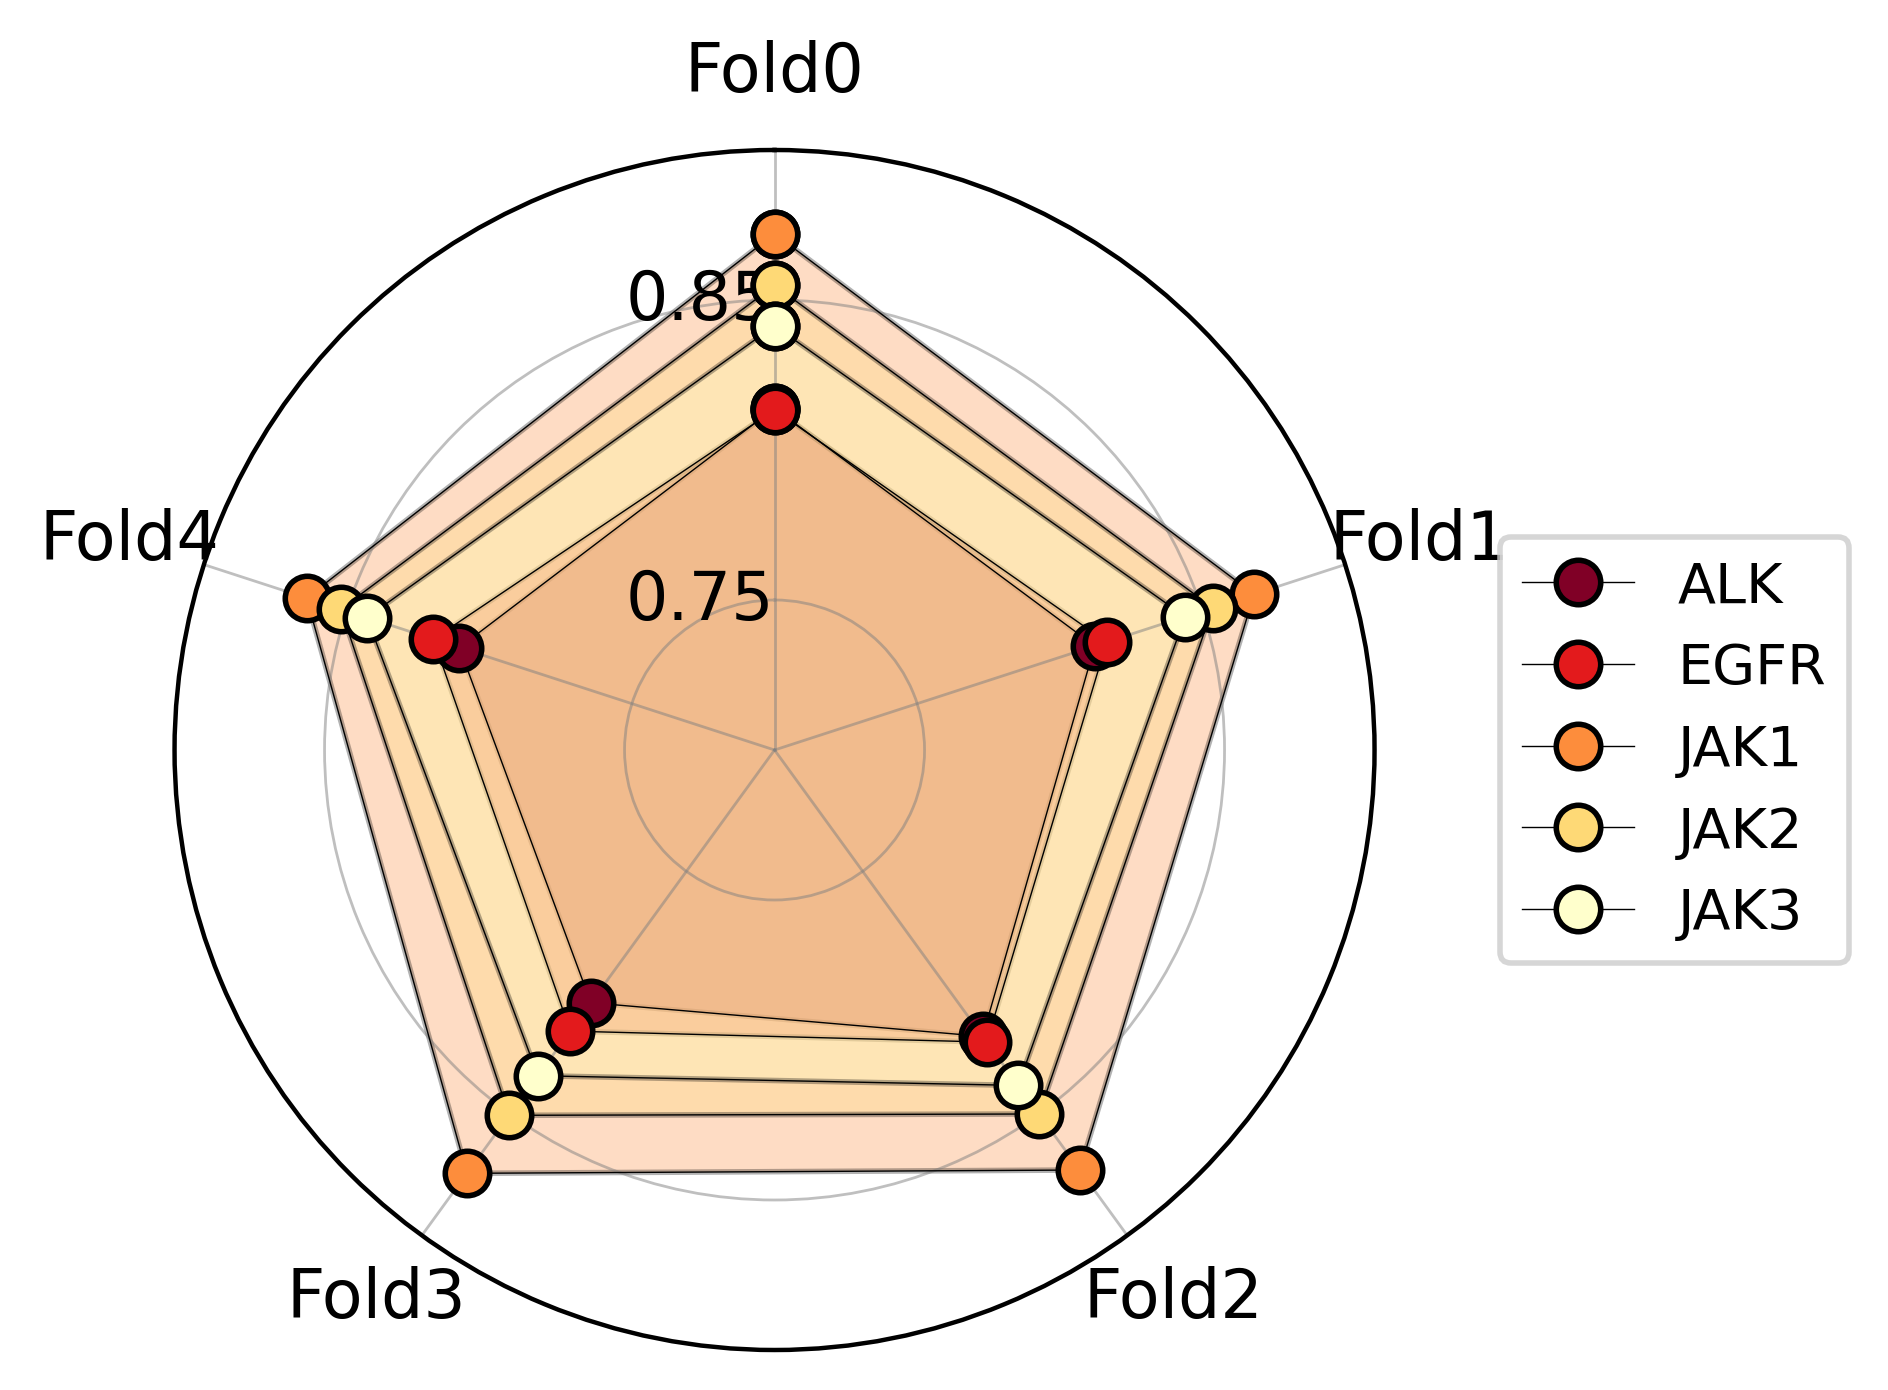

In [6]:
plt.rcParams["patch.force_edgecolor"] = True

df = davis_CI_valid_Fold.copy()
N = df.shape[0]
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

fig = figure(figsize=(5,5),dpi =400)  
ax = fig.add_axes([0.1, 0.1, 0.6, 0.6], polar=True)
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
ax.set_rlabel_position(0)
plt.xticks(angles[:-1], df['Data_type'], color="black", size=12)
plt.ylim(0.7,0.9)
plt.yticks(np.arange(0.75,0.9 ,0.10),color="black", size=12,verticalalignment='center',horizontalalignment='right')
plt.grid(which='major',axis ="x", linestyle='-', linewidth='0.5', color='gray',alpha=0.5)
plt.grid(which='major',axis ="y", linestyle='-', linewidth='0.5', color='gray',alpha=0.5)

values=df['ALK'].values.flatten().tolist()
values += values[:1]
ax.fill(angles, values, '#800026', alpha=0.3)
ax.plot(angles, values, marker='o', markerfacecolor='#800026', markersize=8, color='k', linewidth=0.25,label="ALK")

values=df['EGFR'].values.flatten().tolist()
values += values[:1]
ax.fill(angles, values, '#e31a1c', alpha=0.3)
ax.plot(angles, values, marker='o', markerfacecolor='#e31a1c', markersize=8, color='k', linewidth=0.25,label="EGFR")

values=df['JAK1'].values.flatten().tolist()
values += values[:1]
ax.fill(angles, values, '#fd8d3c', alpha=0.3)
ax.plot(angles, values, marker='o', markerfacecolor='#fd8d3c', markersize=8, color='k', linewidth=0.25,label="JAK1")

values=df['JAK2'].values.flatten().tolist()
values += values[:1]
ax.fill(angles, values, '#fed976', alpha=0.3)
ax.plot(angles, values, marker='o', markerfacecolor='#fed976', markersize=8, color='k', linewidth=0.25,label="JAK2")

values=df['JAK3'].values.flatten().tolist()
values += values[:1]
ax.fill(angles, values, '#ffffcc', alpha=0.3)
ax.plot(angles, values, marker='o', markerfacecolor='#ffffcc', markersize=8, color='k', linewidth=0.25,label="JAK3")

plt.legend(loc="center",bbox_to_anchor=(1.25, 0, 0, 1))
# plt.savefig("TK_5foldcv_validation-set_ci.jpg")

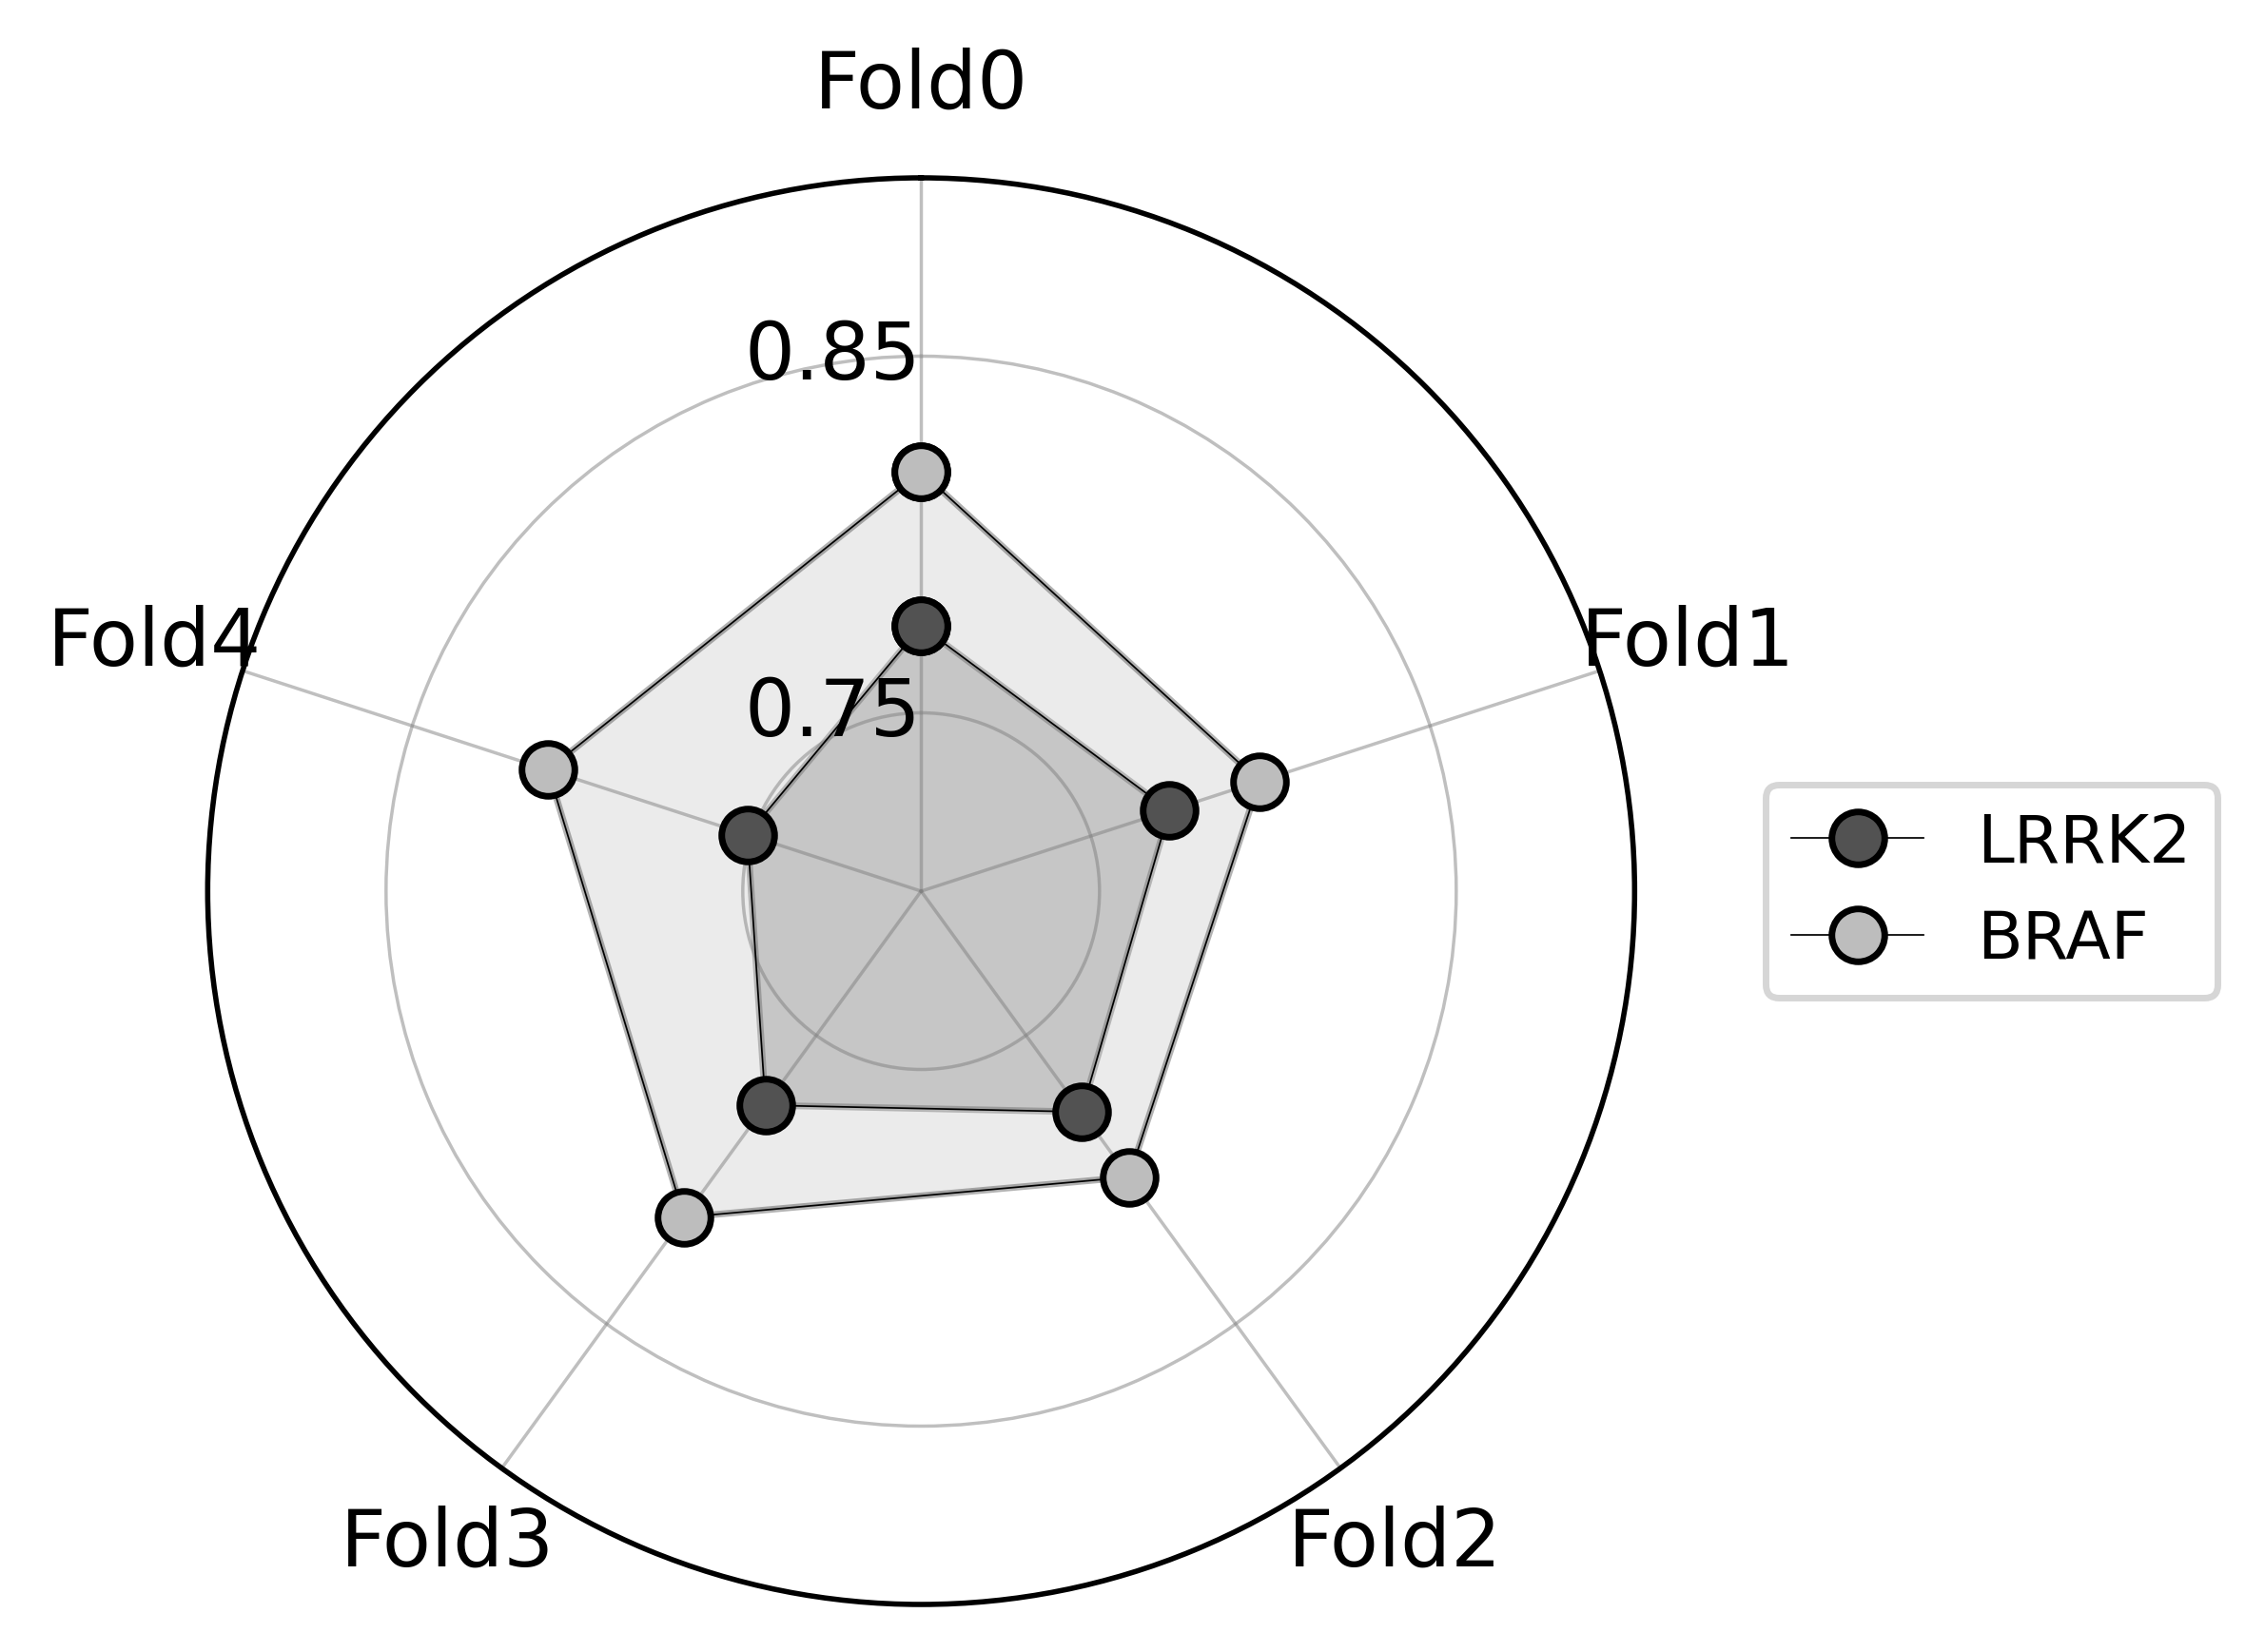

In [7]:
plt.rcParams["patch.force_edgecolor"] = True

df = davis_CI_valid_Fold.copy()
N = df.shape[0]
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

fig = figure(figsize=(5,5),dpi =500)  
ax = fig.add_axes([0.1, 0.1, 0.6, 0.6], polar=True)
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
ax.set_rlabel_position(0)
plt.xticks(angles[:-1], df['Data_type'], color="black", size=12)
plt.ylim(0.7,0.9)
plt.yticks(np.arange(0.75,0.9 ,0.1),color="black", size=12,verticalalignment='center',horizontalalignment='right')
plt.grid(which='major',axis ="x", linestyle='-', linewidth='0.5', color='gray',alpha=0.5)
plt.grid(which='major',axis ="y", linestyle='-', linewidth='0.5', color='gray',alpha=0.5)

values=df['LRRK2'].values.flatten().tolist()
values += values[:1]
ax.fill(angles, values, '#525252', alpha=0.3)
ax.plot(angles, values, marker='o', markerfacecolor='#525252', markersize=8, color='k', linewidth=0.25,label="LRRK2")

values=df['BRAF'].values.flatten().tolist()
values += values[:1]
ax.fill(angles, values, '#bdbdbd', alpha=0.3)
ax.plot(angles, values, marker='o', markerfacecolor='#bdbdbd', markersize=8, color='k', linewidth=0.25,label="BRAF")

plt.legend(loc="center",bbox_to_anchor=(1.25, 0, 0, 1))

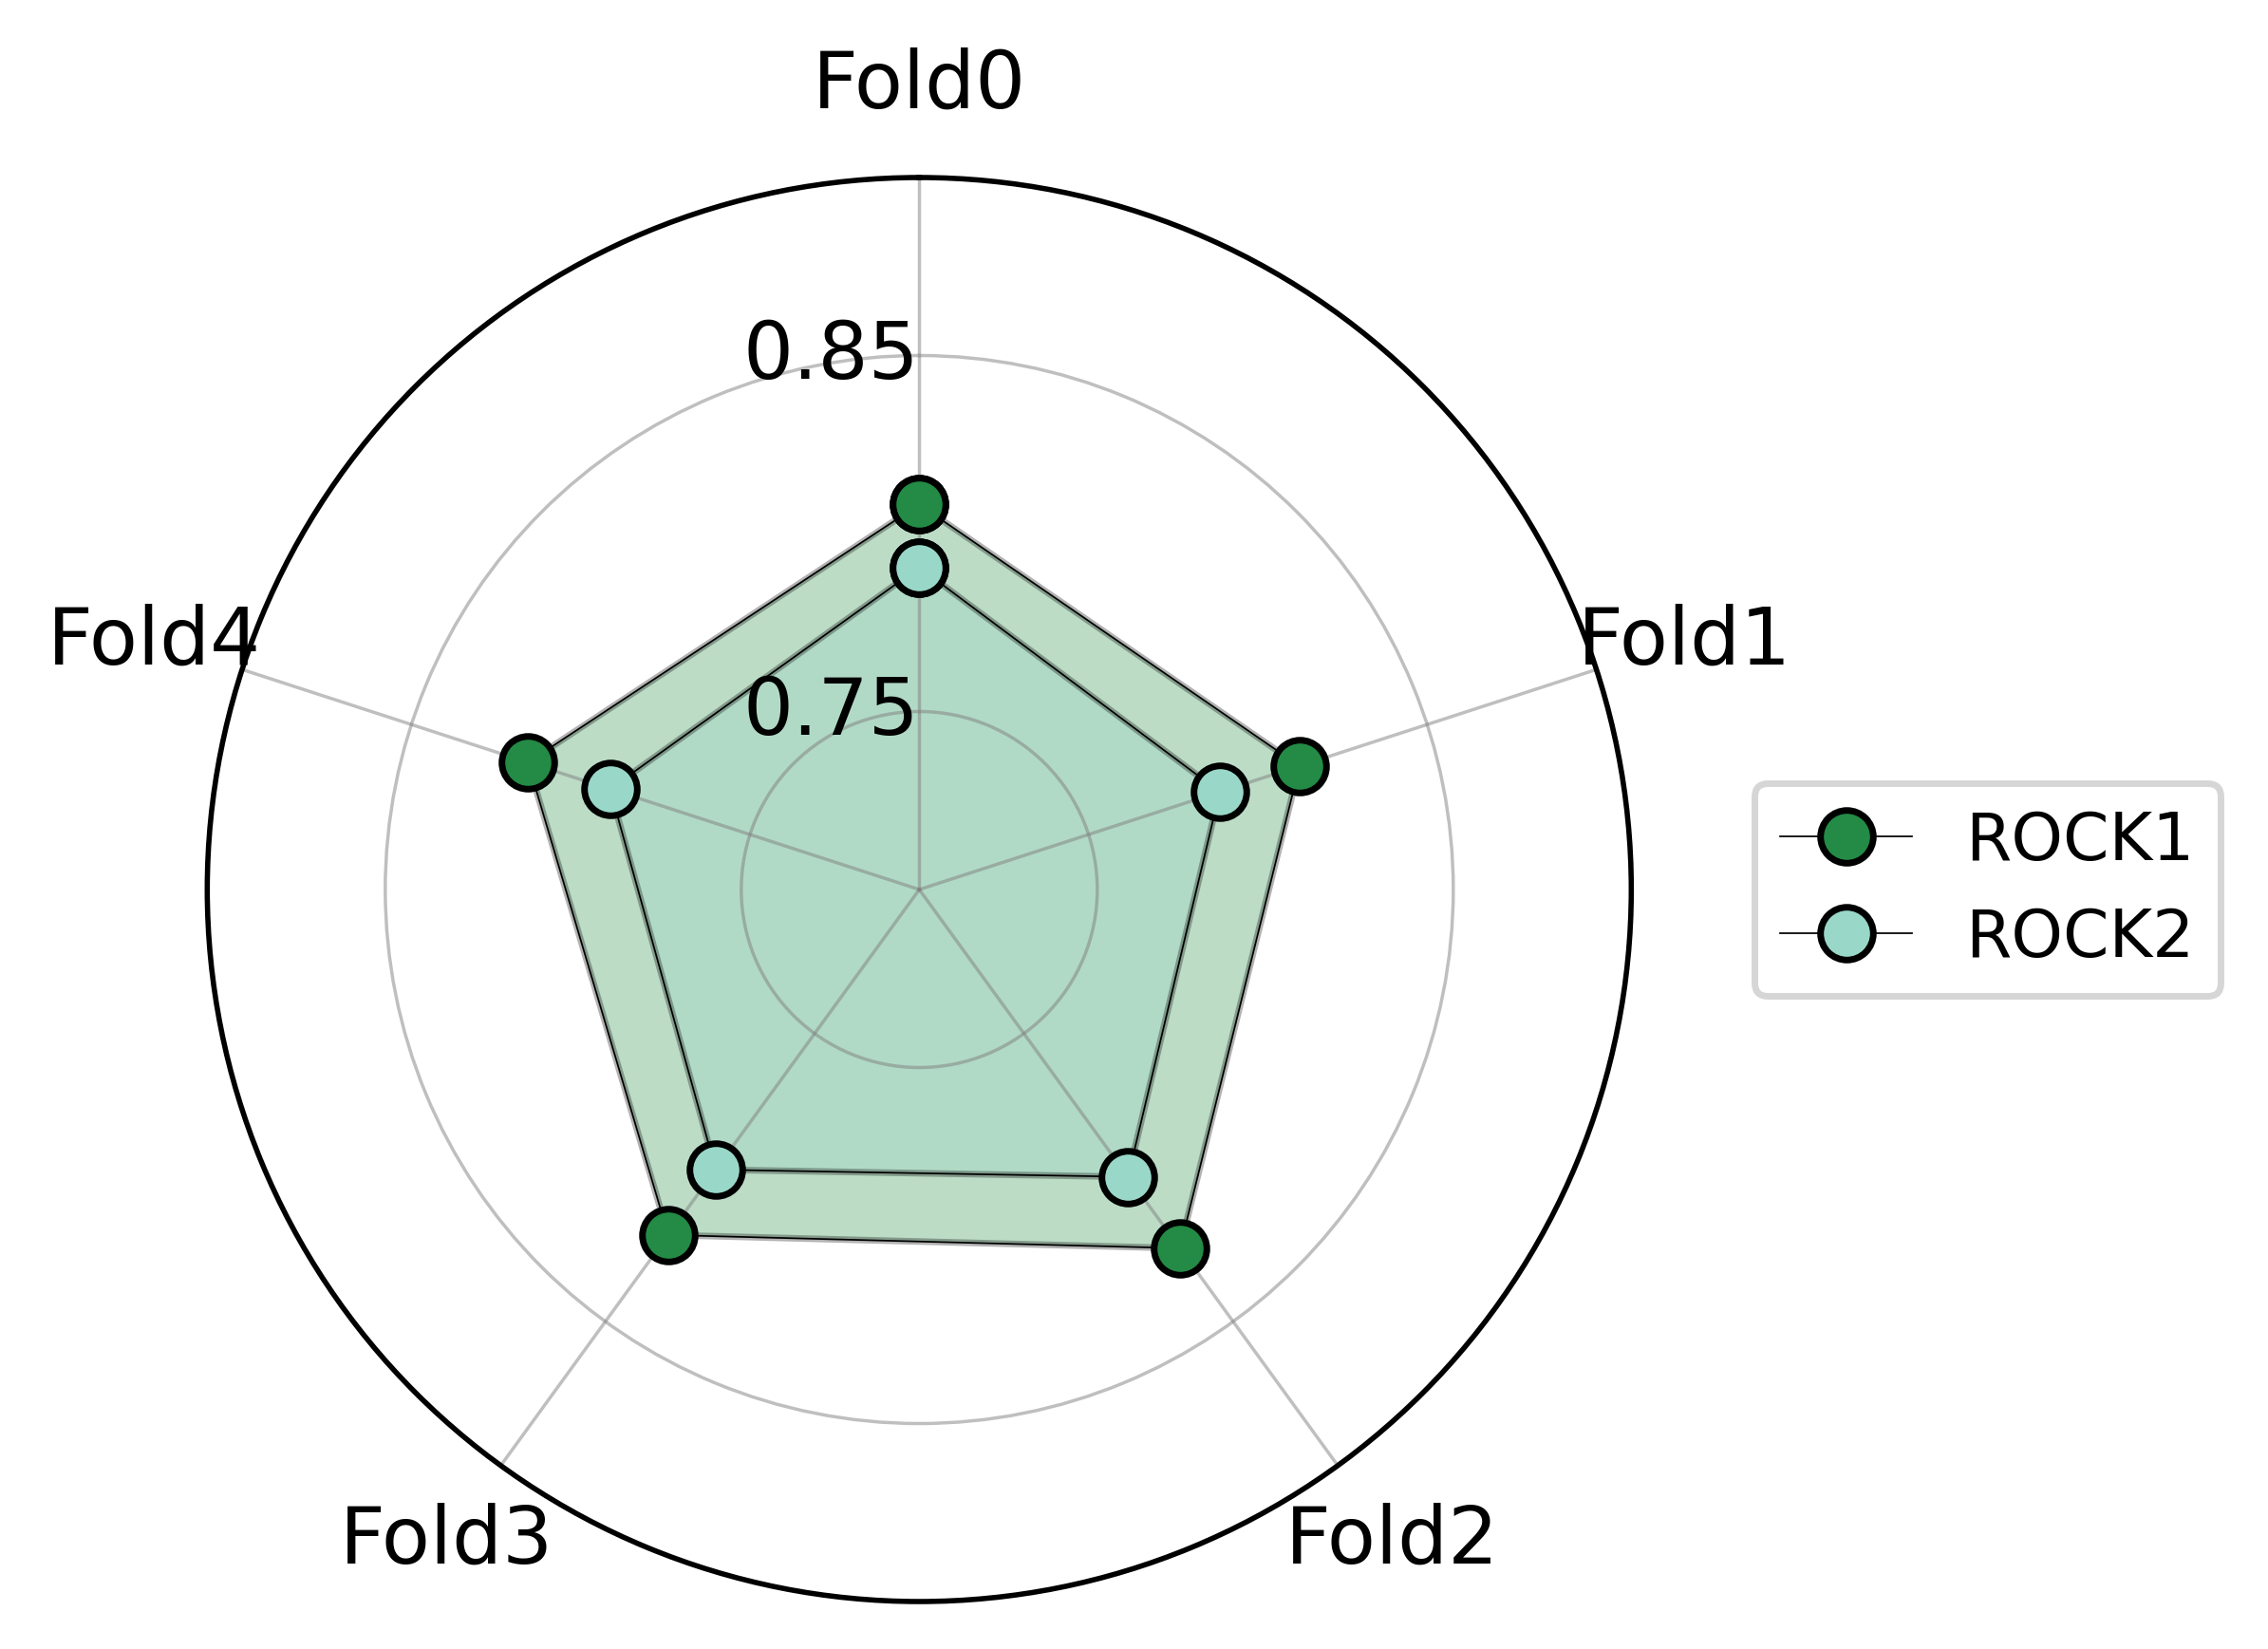

In [8]:
plt.rcParams["patch.force_edgecolor"] = True

df = davis_CI_valid_Fold.copy()
N = df.shape[0]
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

fig = figure(figsize=(5,5),dpi =500)  
ax = fig.add_axes([0.1, 0.1, 0.6, 0.6], polar=True)
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
ax.set_rlabel_position(0)
plt.xticks(angles[:-1], df['Data_type'], color="black", size=12)
plt.ylim(0.7,0.9)
plt.yticks(np.arange(0.75,0.9,0.1),color="black", size=12,verticalalignment='center',horizontalalignment='right')
plt.grid(which='major',axis ="x", linestyle='-', linewidth='0.5', color='gray',alpha=0.5)
plt.grid(which='major',axis ="y", linestyle='-', linewidth='0.5', color='gray',alpha=0.5)


values=df['ROCK1'].values.flatten().tolist()
values += values[:1]
ax.fill(angles, values, '#238b45', alpha=0.3)
ax.plot(angles, values, marker='o', markerfacecolor='#238b45', markersize=8, color='k', linewidth=0.25,label="ROCK1")

values=df['ROCK2'].values.flatten().tolist()
values += values[:1]
ax.fill(angles, values, '#99d8c9', alpha=0.3)
ax.plot(angles, values, marker='o', markerfacecolor='#99d8c9', markersize=8, color='k', linewidth=0.25,label="ROCK2")

plt.legend(loc="center",bbox_to_anchor=(1.25, 0, 0, 1))

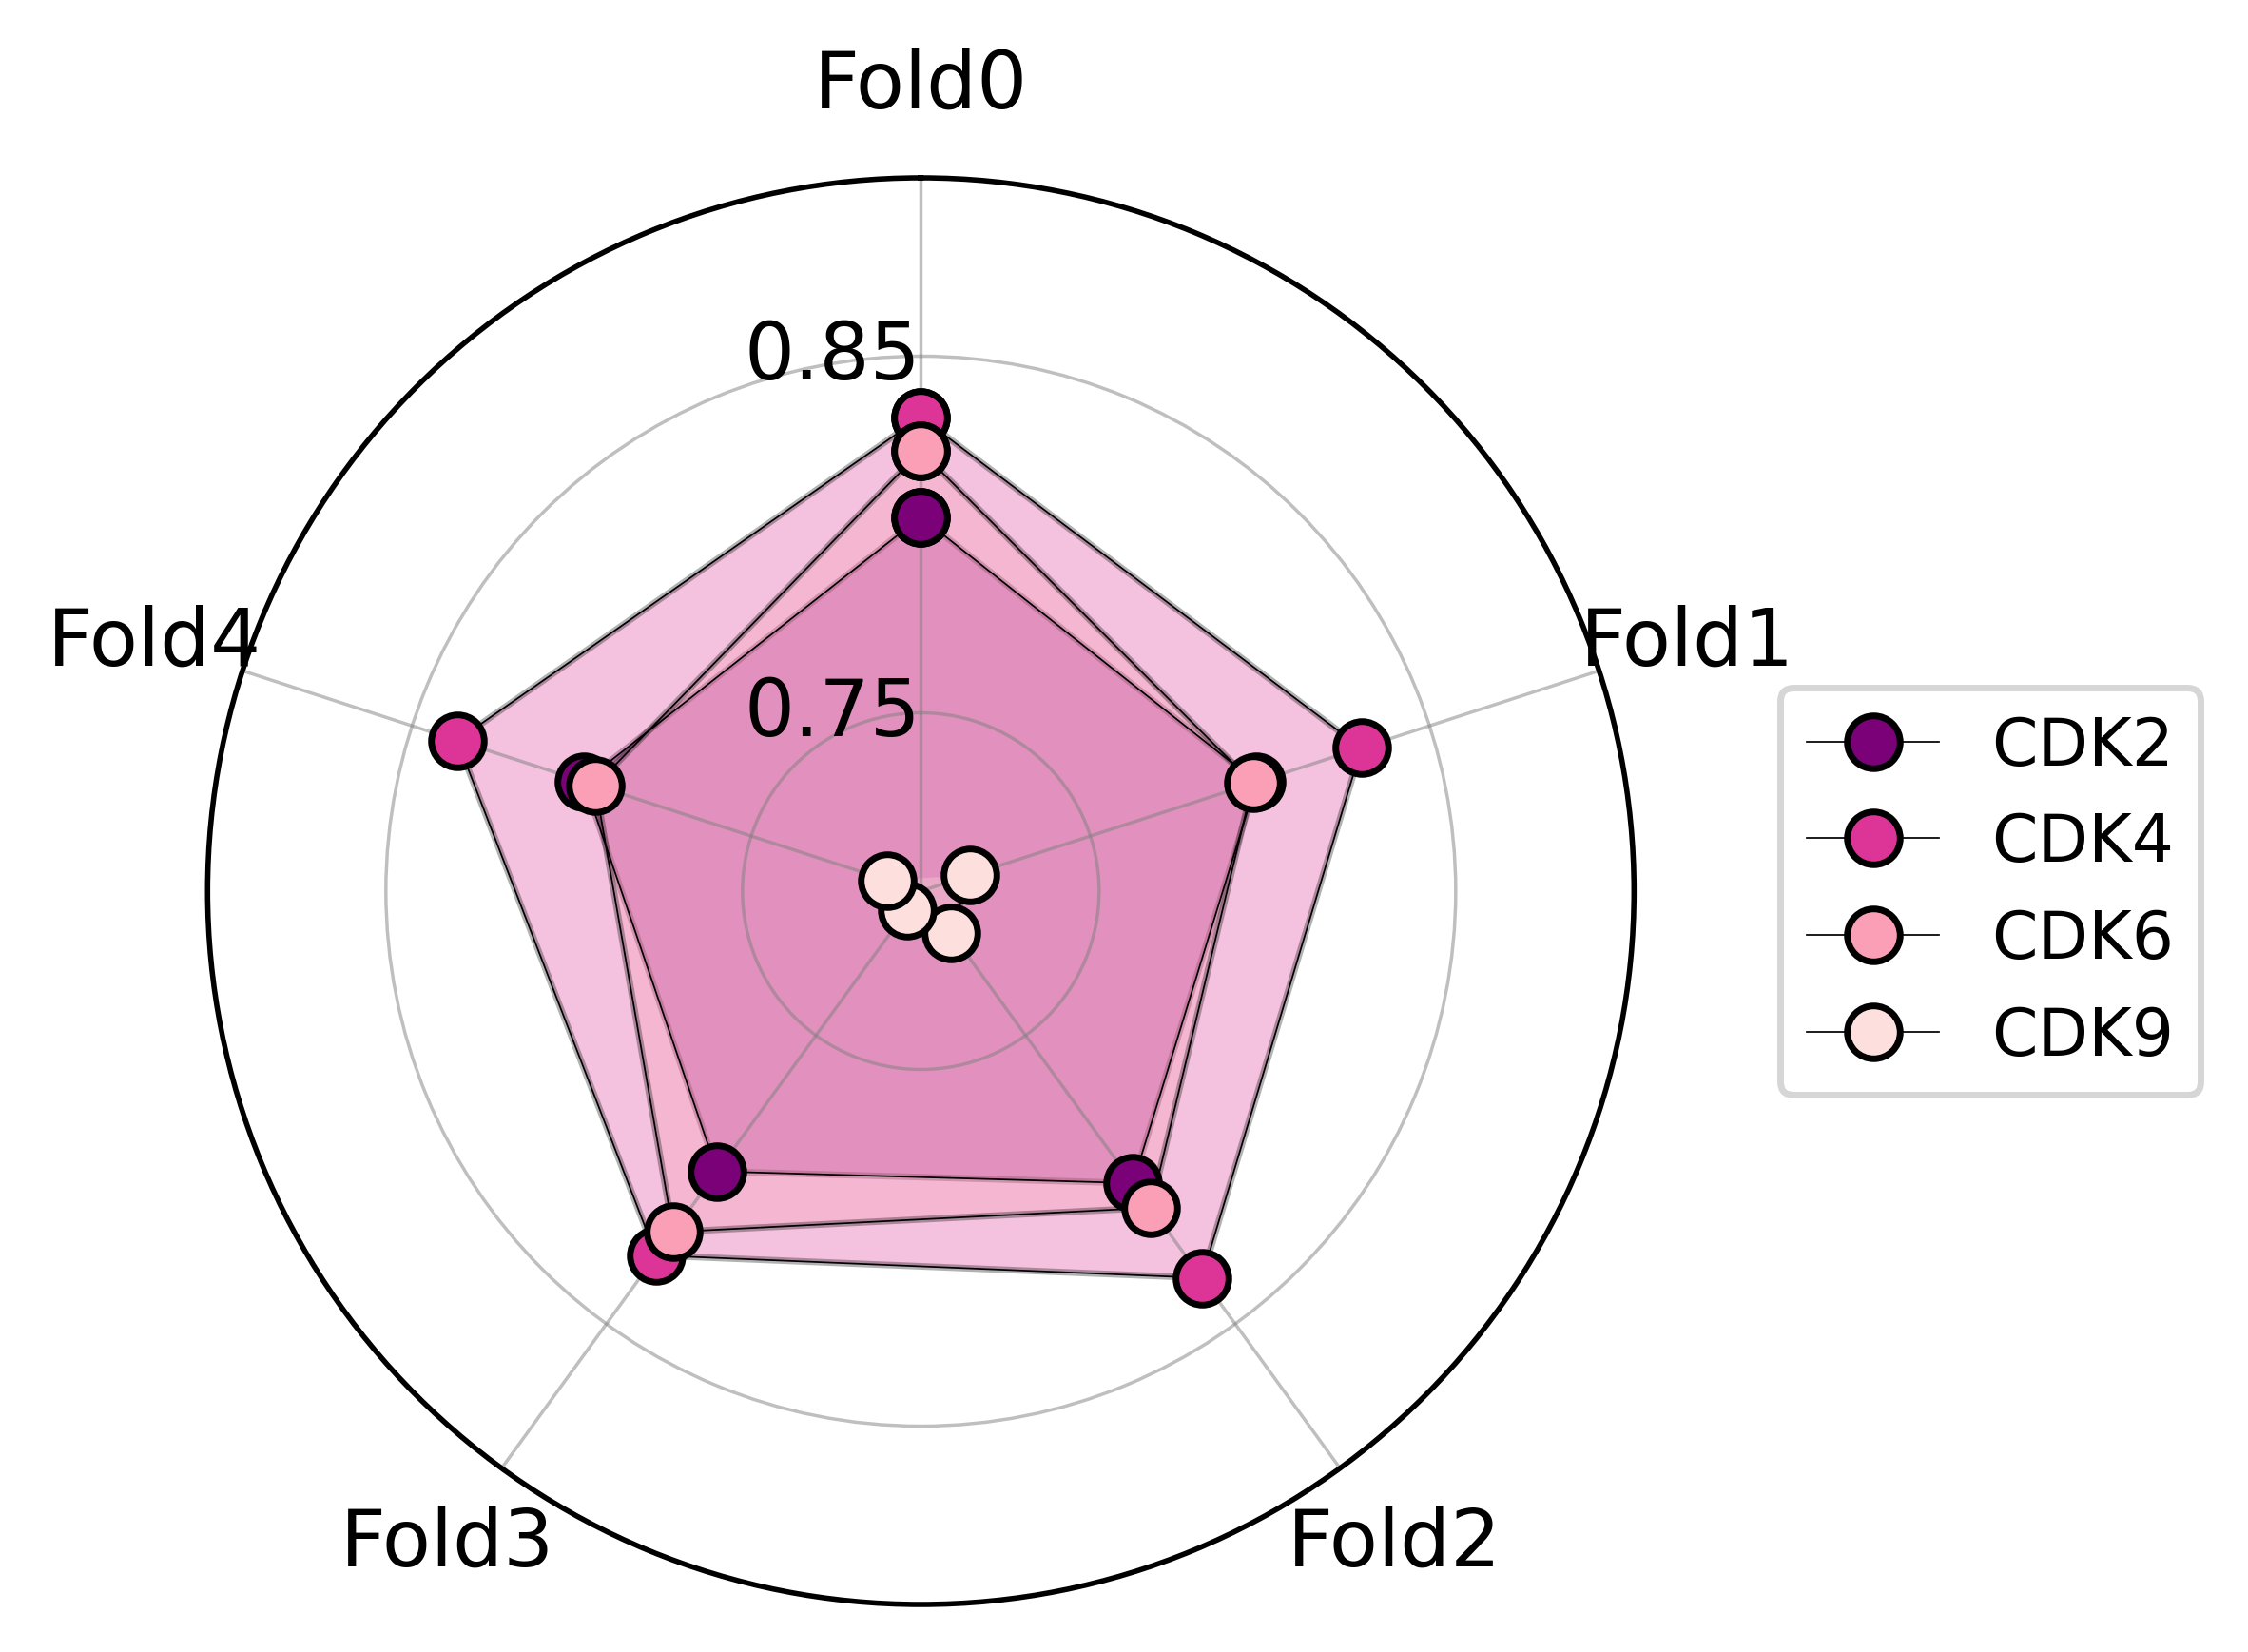

In [9]:
plt.rcParams["patch.force_edgecolor"] = True

df = davis_CI_valid_Fold.copy()
N = df.shape[0]
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

fig = figure(figsize=(5,5),dpi =500)  
ax = fig.add_axes([0.1, 0.1, 0.6, 0.6], polar=True)
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
ax.set_rlabel_position(0)
plt.xticks(angles[:-1], df['Data_type'], color="black", size=12)
plt.ylim(0.70,0.9)
plt.yticks(np.arange(0.75,0.9 ,0.1),color="black", size=12,verticalalignment='center',horizontalalignment='right')
plt.grid(which='major',axis ="x", linestyle='-', linewidth='0.5', color='gray',alpha=0.5)
plt.grid(which='major',axis ="y", linestyle='-', linewidth='0.5', color='gray',alpha=0.5)

values=df['CDK2'].values.flatten().tolist()
values += values[:1]
ax.fill(angles, values, '#7a0177', alpha=0.3)
ax.plot(angles, values, marker='o', markerfacecolor='#7a0177', markersize=8, color='k', linewidth=0.25,label="CDK2")

values=df['CDK4'].values.flatten().tolist()
values += values[:1]
ax.fill(angles, values, '#dd3497', alpha=0.3)
ax.plot(angles, values, marker='o', markerfacecolor='#dd3497', markersize=8, color='k', linewidth=0.25,label="CDK4")

values=df['CDK6'].values.flatten().tolist()
values += values[:1]
ax.fill(angles, values, '#fa9fb5', alpha=0.3)
ax.plot(angles, values, marker='o', markerfacecolor='#fa9fb5', markersize=8, color='k', linewidth=0.25,label="CDK6")

values=df['CDK9'].values.flatten().tolist()
values += values[:1]
ax.fill(angles, values, '#fde0dd', alpha=0.3)
ax.plot(angles, values, marker='o', markerfacecolor='#fde0dd', markersize=8, color='k', linewidth=0.25,label="CDK9")

plt.legend(loc="center",bbox_to_anchor=(1.25, 0, 0, 1))

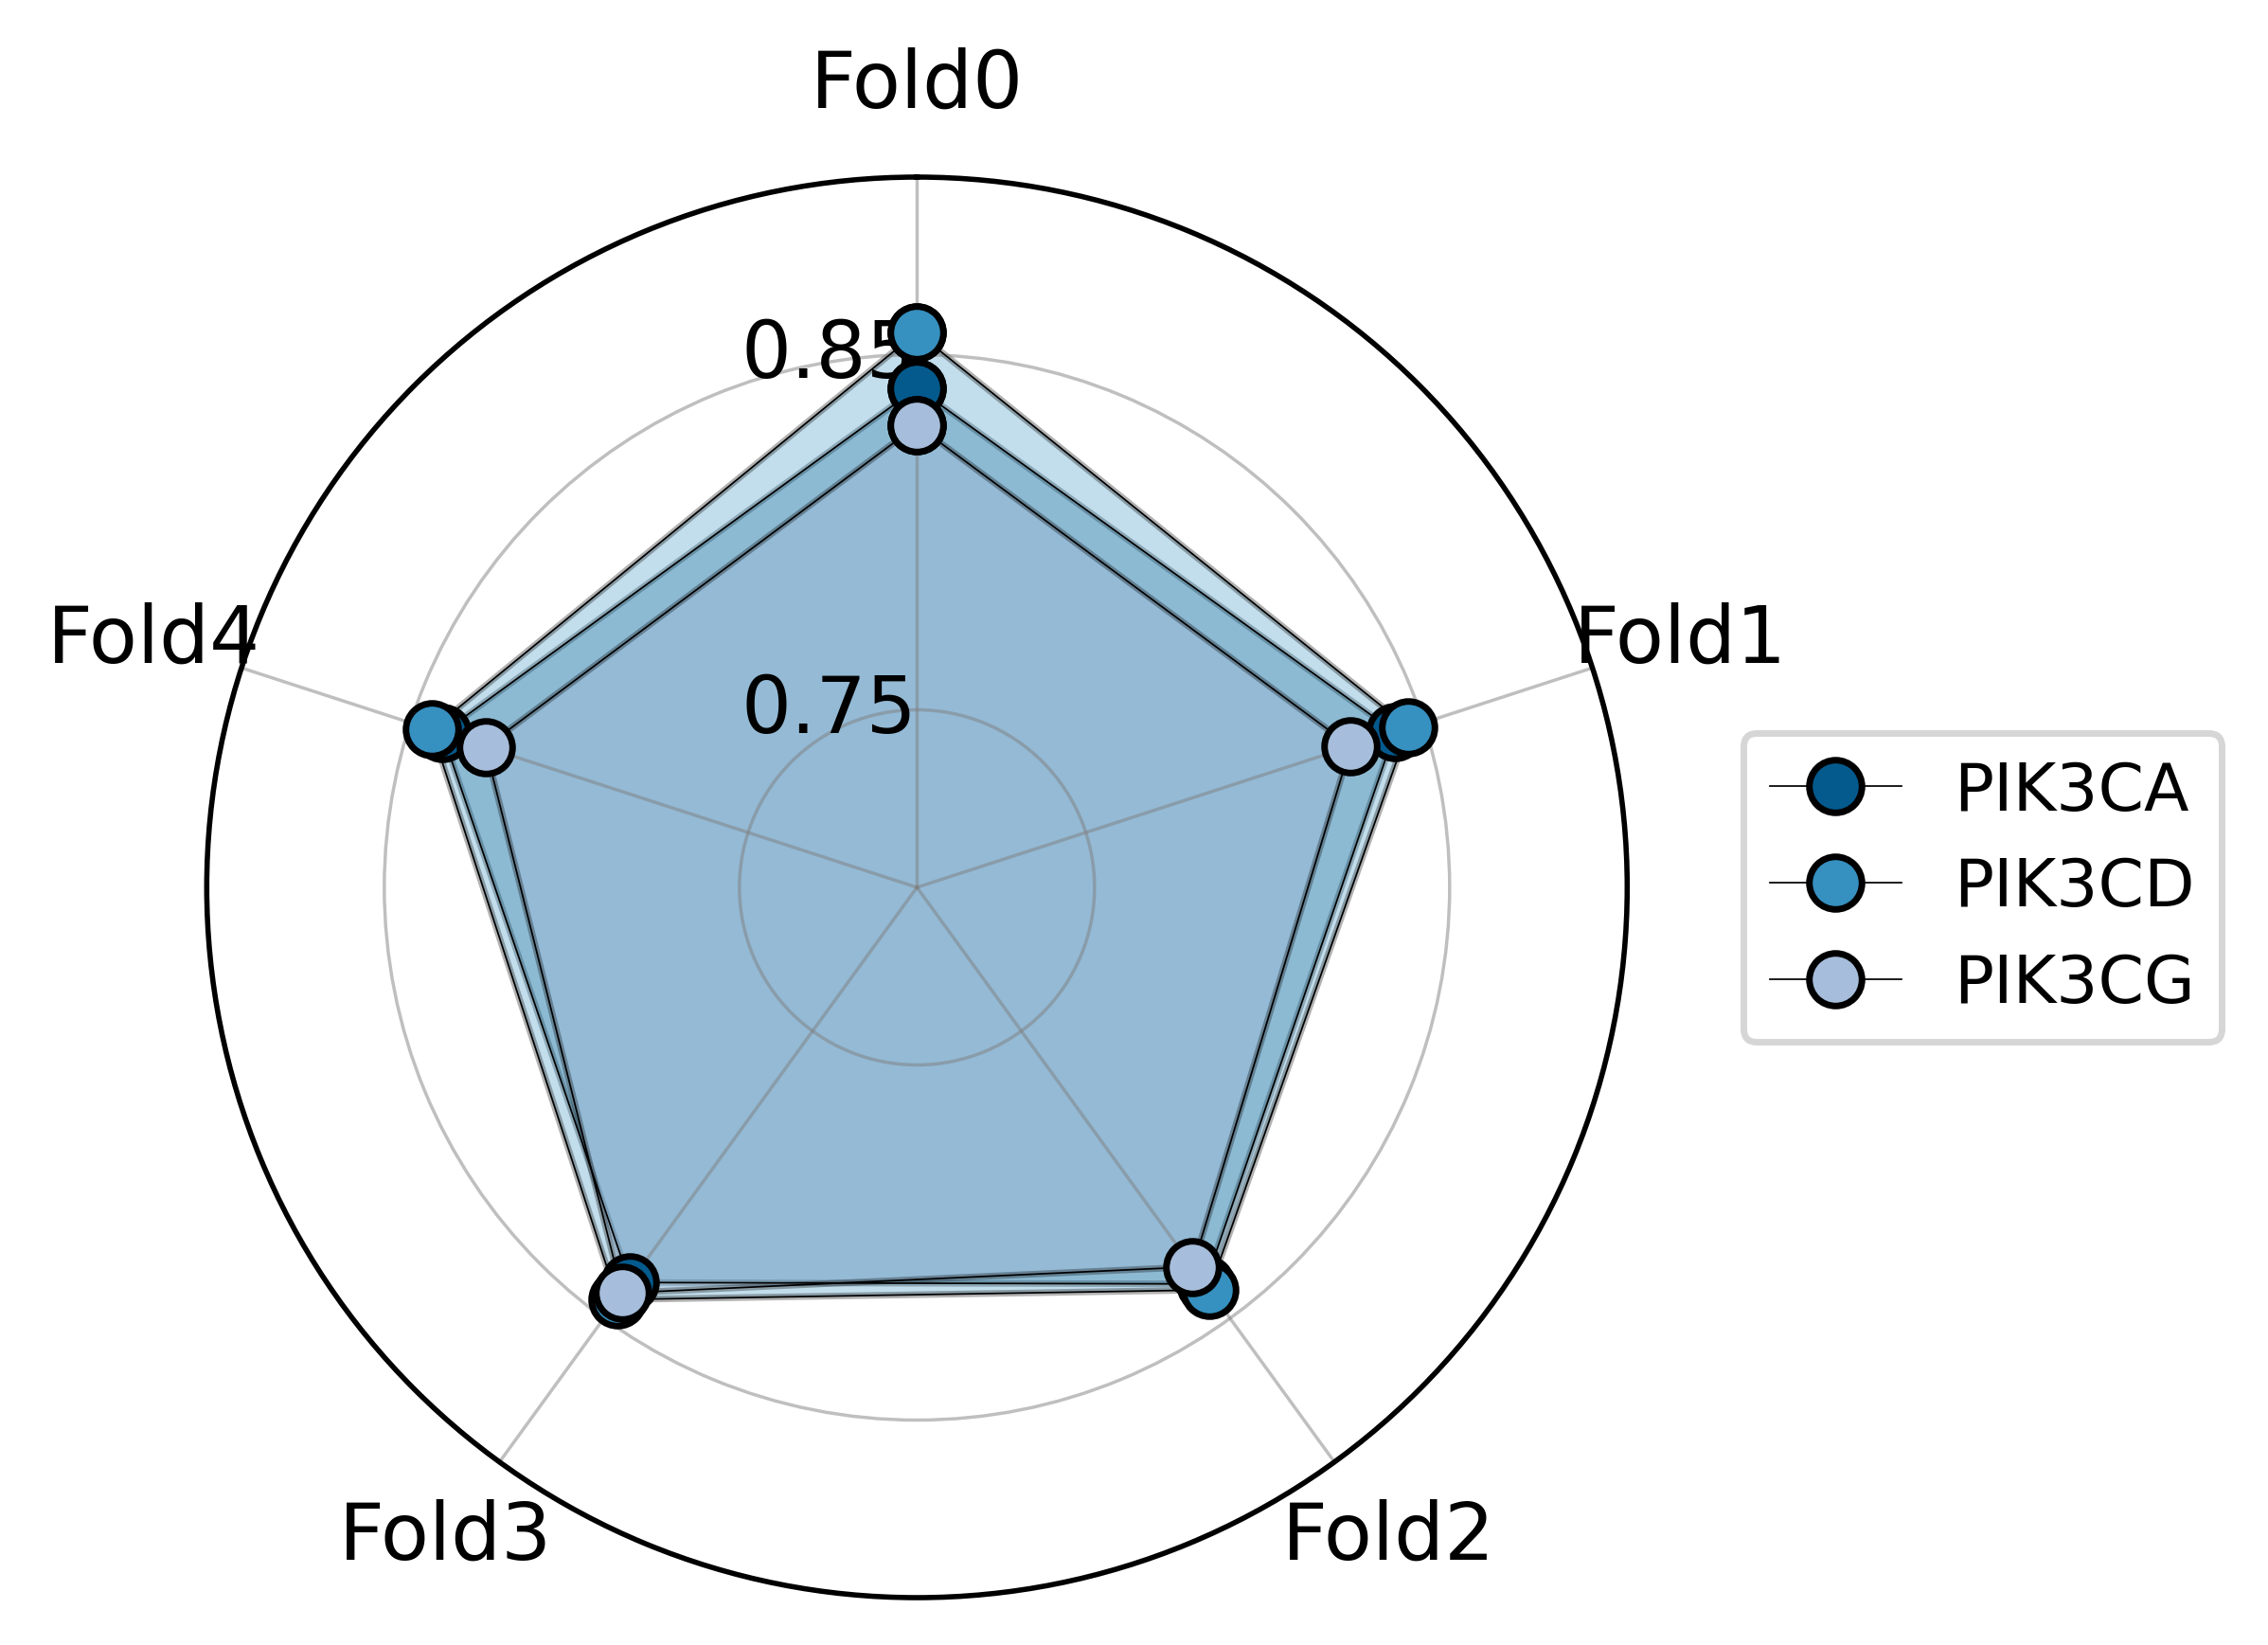

In [10]:
plt.rcParams["patch.force_edgecolor"] = True

df = davis_CI_valid_Fold.copy()
N = df.shape[0]
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

fig = figure(figsize=(5,5),dpi =500)  
ax = fig.add_axes([0.1, 0.1, 0.6, 0.6], polar=True)
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
ax.set_rlabel_position(0)
plt.xticks(angles[:-1], df['Data_type'], color="black", size=12)
plt.ylim(0.70,0.9)
plt.yticks(np.arange(0.75,0.9,0.1),color="black", size=12,verticalalignment='center',horizontalalignment='right')
plt.grid(which='major',axis ="x", linestyle='-', linewidth='0.5', color='gray',alpha=0.5)
plt.grid(which='major',axis ="y", linestyle='-', linewidth='0.5', color='gray',alpha=0.5)

values=df['PIK3CA'].values.flatten().tolist()
values += values[:1]
ax.fill(angles, values, '#045a8d', alpha=0.3)
ax.plot(angles, values, marker='o', markerfacecolor='#045a8d', markersize=8, color='k', linewidth=0.25,label="PIK3CA")

values=df['PIK3CD'].values.flatten().tolist()
values += values[:1]
ax.fill(angles, values, '#3690c0', alpha=0.3)
ax.plot(angles, values, marker='o', markerfacecolor='#3690c0', markersize=8, color='k', linewidth=0.25,label="PIK3CD")

values=df['PIK3CG'].values.flatten().tolist()
values += values[:1]
ax.fill(angles, values, '#a6bddb', alpha=0.3)
ax.plot(angles, values, marker='o', markerfacecolor='#a6bddb', markersize=8, color='k', linewidth=0.25,label="PIK3CG")

plt.legend(loc="center",bbox_to_anchor=(1.25, 0, 0, 1))

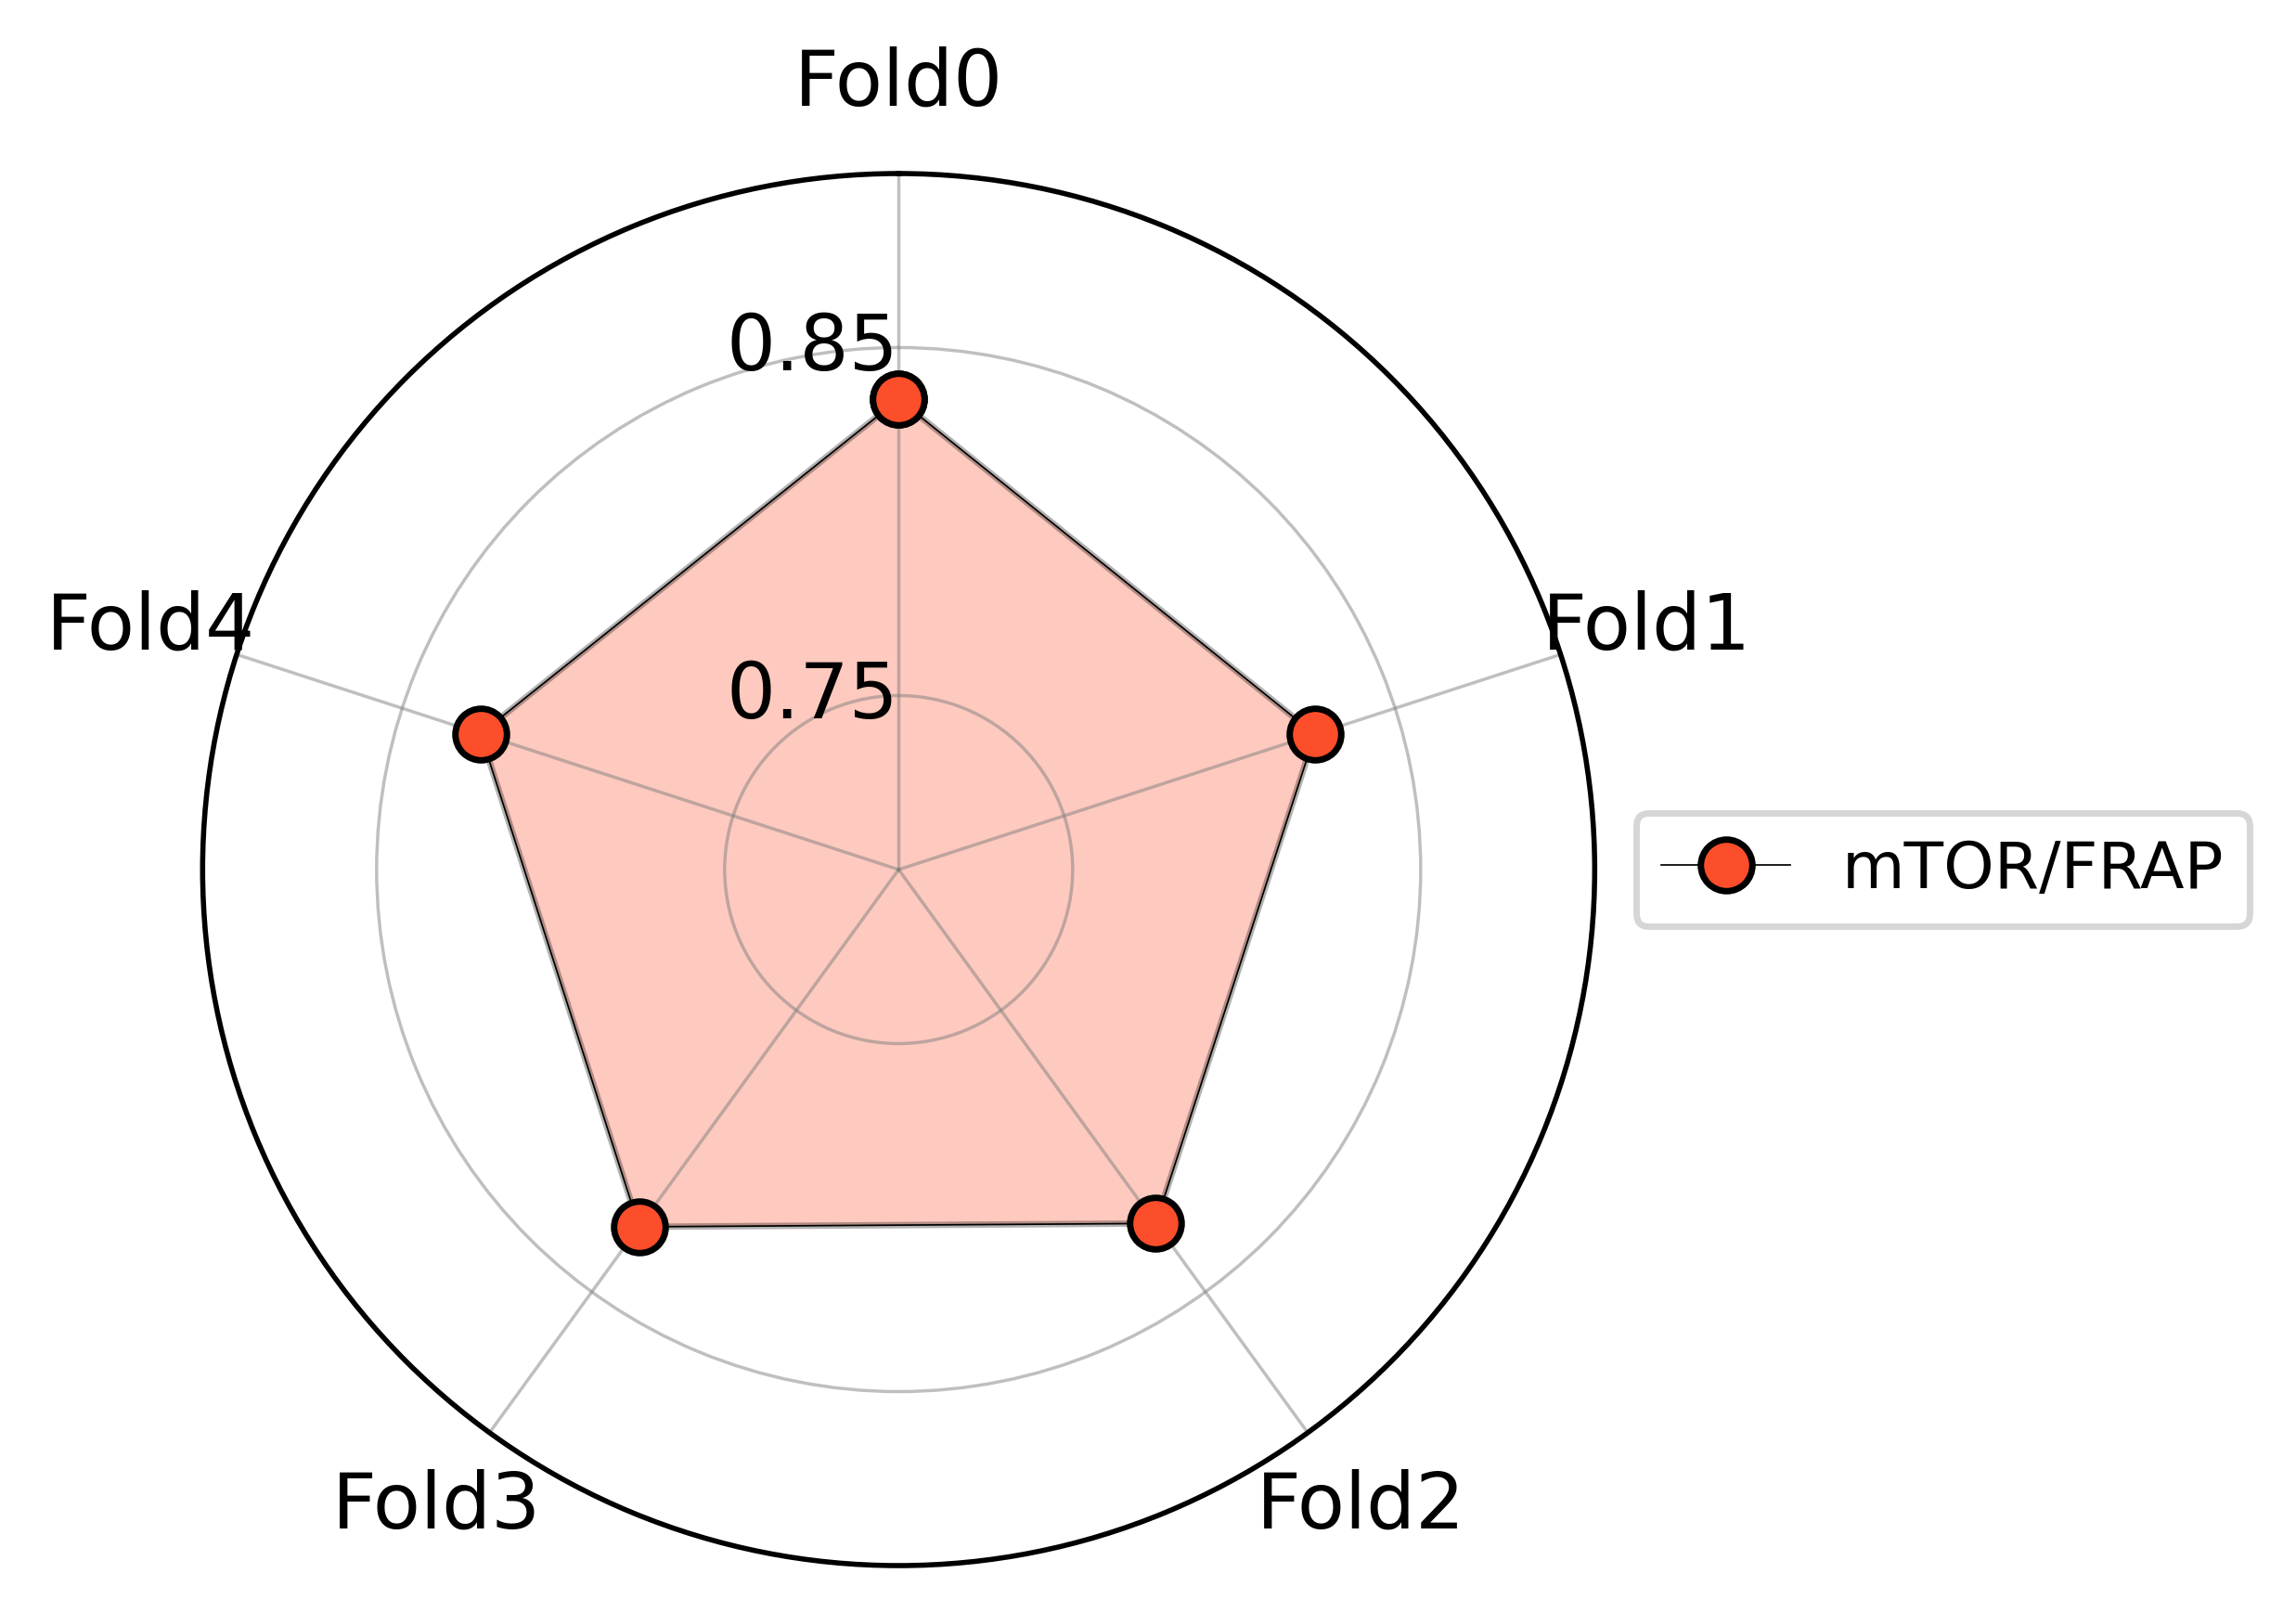

In [11]:
plt.rcParams["patch.force_edgecolor"] = True

df = davis_CI_valid_Fold.copy()
N = df.shape[0]
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

fig = figure(figsize=(5,5),dpi =500)  
ax = fig.add_axes([0.1, 0.1, 0.6, 0.6], polar=True)
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
ax.set_rlabel_position(0)
plt.xticks(angles[:-1], df['Data_type'], color="black", size=12)
plt.ylim(0.70,0.9)
plt.yticks(np.arange(0.75,0.9 ,0.1),color="black", size=12,verticalalignment='center',horizontalalignment='right')
plt.grid(which='major',axis ="x", linestyle='-', linewidth='0.5', color='gray',alpha=0.5)
plt.grid(which='major',axis ="y", linestyle='-', linewidth='0.5', color='gray',alpha=0.5)

values=df['mTOR/FRAP'].values.flatten().tolist()
values += values[:1]
ax.fill(angles, values, '#fc4e2a', alpha=0.3)
ax.plot(angles, values, marker='o', markerfacecolor='#fc4e2a', markersize=8, color='k', linewidth=0.25,label="mTOR/FRAP")

plt.legend(loc="center",bbox_to_anchor=(1.25, 0, 0, 1))

In [12]:


plt.rcParams["patch.force_edgecolor"] = True

df = davis_CI_valid_Fold.copy()
N = df.shape[0]
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

fig = figure(figsize=(20,15),dpi =600)
#fig,axs=plt.subplots(2,3,figsize=(20,30),sharex=True,sharey=False) 
#ax = fig.add_axes([0.1, 0.1, 0.6, 0.6], polar=True)

ax1 = fig.add_subplot(231, polar=True)
ax1.set_theta_offset(pi / 2)
ax1.set_theta_direction(-1)
ax1.set_rlabel_position(0)
plt.xticks(angles[:-1], df['Data_type'], color="black", size=12)
plt.ylim(0.65,0.9)
plt.yticks(np.arange(0.75,0.9 ,0.1),color="black", size=12,verticalalignment='center',horizontalalignment='right')
plt.grid(which='major',axis ="x", linestyle='-', linewidth='0.5', color='gray',alpha=0.5)
plt.grid(which='major',axis ="y", linestyle='-', linewidth='0.5', color='gray',alpha=0.5)

values=df['ALK'].values.flatten().tolist()
values += values[:1]
ax1.fill(angles, values, '#800026', alpha=0.3)
ax1.plot(angles, values, marker='o', markerfacecolor='#800026', markersize=8, color='k', linewidth=0.25,label="ALK")

values=df['EGFR'].values.flatten().tolist()
values += values[:1]
ax1.fill(angles, values, '#e31a1c', alpha=0.3)
ax1.plot(angles, values, marker='o', markerfacecolor='#e31a1c', markersize=8, color='k', linewidth=0.25,label="EGFR")

values=df['JAK1'].values.flatten().tolist()
values += values[:1]
ax1.fill(angles, values, '#fd8d3c', alpha=0.3)
ax1.plot(angles, values, marker='o', markerfacecolor='#fd8d3c', markersize=8, color='k', linewidth=0.25,label="JAK1")

values=df['JAK2'].values.flatten().tolist()
values += values[:1]
ax1.fill(angles, values, '#fed976', alpha=0.3)
ax1.plot(angles, values, marker='o', markerfacecolor='#fed976', markersize=8, color='k', linewidth=0.25,label="JAK2")

values=df['JAK3'].values.flatten().tolist()
values += values[:1]
ax1.fill(angles, values, '#ffffcc', alpha=0.3)
ax1.plot(angles, values, marker='o', markerfacecolor='#ffffcc', markersize=8, color='k', linewidth=0.25,label="JAK3")

#plt.legend(loc="center",bbox_to_anchor=(1.25, 0, 0, 1))

ax2 = fig.add_subplot(232, polar=True)
ax2.set_theta_offset(pi / 2)
ax2.set_theta_direction(-1)
ax2.set_rlabel_position(0)
plt.xticks(angles[:-1], df['Data_type'], color="black", size=12)
plt.ylim(0.65,0.9)
plt.yticks(np.arange(0.75,0.9 ,0.1),color="black", size=12,verticalalignment='center',horizontalalignment='right')
plt.grid(which='major',axis ="x", linestyle='-', linewidth='0.5', color='gray',alpha=0.5)
plt.grid(which='major',axis ="y", linestyle='-', linewidth='0.5', color='gray',alpha=0.5)

values=df['LRRK2'].values.flatten().tolist()
values += values[:1]
ax2.fill(angles, values, '#525252', alpha=0.3)
ax2.plot(angles, values, marker='o', markerfacecolor='#525252', markersize=8, color='k', linewidth=0.25,label="LRRK2")

values=df['BRAF'].values.flatten().tolist()
values += values[:1]
ax2.fill(angles, values, '#bdbdbd', alpha=0.3)
ax2.plot(angles, values, marker='o', markerfacecolor='#bdbdbd', markersize=8, color='k', linewidth=0.25,label="BRAF")

#plt.legend(loc="center",bbox_to_anchor=(1.25, 0, 0, 1))

ax3 = fig.add_subplot(233, polar=True)
ax3.set_theta_offset(pi / 2)
ax3.set_theta_direction(-1)
ax3.set_rlabel_position(0)
plt.xticks(angles[:-1], df['Data_type'], color="black", size=12)
plt.ylim(0.65,0.9)
plt.yticks(np.arange(0.75,0.9 ,0.1),color="black", size=12,verticalalignment='center',horizontalalignment='right')
plt.grid(which='major',axis ="x", linestyle='-', linewidth='0.5', color='gray',alpha=0.5)
plt.grid(which='major',axis ="y", linestyle='-', linewidth='0.5', color='gray',alpha=0.5)


values=df['ROCK1'].values.flatten().tolist()
values += values[:1]
ax3.fill(angles, values, '#238b45', alpha=0.3)
ax3.plot(angles, values, marker='o', markerfacecolor='#238b45', markersize=8, color='k', linewidth=0.25,label="ROCK1")

values=df['ROCK2'].values.flatten().tolist()
values += values[:1]
ax3.fill(angles, values, '#99d8c9', alpha=0.3)
ax3.plot(angles, values, marker='o', markerfacecolor='#99d8c9', markersize=8, color='k', linewidth=0.25,label="ROCK2")

#plt.legend(loc="center",bbox_to_anchor=(1.25, 0, 0, 1))

ax4 = fig.add_subplot(234, polar=True)
ax4.set_theta_offset(pi / 2)
ax4.set_theta_direction(-1)
ax4.set_rlabel_position(0)
plt.xticks(angles[:-1], df['Data_type'], color="black", size=12)
plt.ylim(0.65,0.9)
plt.yticks(np.arange(0.75,0.9 ,0.1),color="black", size=12,verticalalignment='center',horizontalalignment='right')
plt.grid(which='major',axis ="x", linestyle='-', linewidth='0.5', color='gray',alpha=0.5)
plt.grid(which='major',axis ="y", linestyle='-', linewidth='0.5', color='gray',alpha=0.5)

values=df['CDK2'].values.flatten().tolist()
values += values[:1]
ax4.fill(angles, values, '#7a0177', alpha=0.3)
ax4.plot(angles, values, marker='o', markerfacecolor='#7a0177', markersize=8, color='k', linewidth=0.25,label="CDK2")

values=df['CDK4'].values.flatten().tolist()
values += values[:1]
ax4.fill(angles, values, '#dd3497', alpha=0.3)
ax4.plot(angles, values, marker='o', markerfacecolor='#dd3497', markersize=8, color='k', linewidth=0.25,label="CDK4")

values=df['CDK6'].values.flatten().tolist()
values += values[:1]
ax4.fill(angles, values, '#fa9fb5', alpha=0.3)
ax4.plot(angles, values, marker='o', markerfacecolor='#fa9fb5', markersize=8, color='k', linewidth=0.25,label="CDK6")

values=df['CDK9'].values.flatten().tolist()
values += values[:1]
ax4.fill(angles, values, '#fde0dd', alpha=0.3)
ax4.plot(angles, values, marker='o', markerfacecolor='#fde0dd', markersize=8, color='k', linewidth=0.25,label="CDK9")

#plt.legend(loc="center",bbox_to_anchor=(1.25, 0, 0, 1))

ax5 = fig.add_subplot(235, polar=True)
ax5.set_theta_offset(pi / 2)
ax5.set_theta_direction(-1)
ax5.set_rlabel_position(0)
plt.xticks(angles[:-1], df['Data_type'], color="black", size=12)
plt.ylim(0.65,0.9)
plt.yticks(np.arange(0.75,0.9 ,0.1),color="black", size=12,verticalalignment='center',horizontalalignment='right')
plt.grid(which='major',axis ="x", linestyle='-', linewidth='0.5', color='gray',alpha=0.5)
plt.grid(which='major',axis ="y", linestyle='-', linewidth='0.5', color='gray',alpha=0.5)

values=df['mTOR/FRAP'].values.flatten().tolist()
values += values[:1]
ax5.fill(angles, values, '#fc4e2a', alpha=0.3)
ax5.plot(angles, values, marker='o', markerfacecolor='#fc4e2a', markersize=8, color='k', linewidth=0.25,label="mTOR")

##plt.legend(loc="center",bbox_to_anchor=(1.25, 0, 0, 1))

ax6 = fig.add_subplot(236, polar=True)
ax6.set_theta_offset(pi / 2)
ax6.set_theta_direction(-1)
ax6.set_rlabel_position(0)
plt.xticks(angles[:-1], df['Data_type'], color="black", size=12)
plt.ylim(0.65,0.9)
plt.yticks(np.arange(0.75,0.9,0.1),color="black", size=12,verticalalignment='center',horizontalalignment='right')
plt.grid(which='major',axis ="x", linestyle='-', linewidth='0.5', color='gray',alpha=0.5)
plt.grid(which='major',axis ="y", linestyle='-', linewidth='0.5', color='gray',alpha=0.5)

values=df['PIK3CA'].values.flatten().tolist()
values += values[:1]
ax6.fill(angles, values, '#045a8d', alpha=0.3)
ax6.plot(angles, values, marker='o', markerfacecolor='#045a8d', markersize=8, color='k', linewidth=0.25,label="PIK3CA")

values=df['PIK3CD'].values.flatten().tolist()
values += values[:1]
ax6.fill(angles, values, '#3690c0', alpha=0.3)
ax6.plot(angles, values, marker='o', markerfacecolor='#3690c0', markersize=8, color='k', linewidth=0.25,label="PIK3CD")
values=df['PIK3CG'].values.flatten().tolist()

values += values[:1]
ax6.fill(angles, values, '#a6bddb', alpha=0.3)
ax6.plot(angles, values, marker='o', markerfacecolor='#a6bddb', markersize=8, color='k', linewidth=0.25,label="PIK3CG")

#plt.legend(loc="center",bbox_to_anchor=(1.25, 0, 0, 1))

#plt.savefig("all_kinase_test.svg")

lines_list = []
labels_list = []
for ax in fig.axes:
    lines, labels = ax.get_legend_handles_labels()
    lines_list.extend(lines)
    labels_list.extend(labels)

fig.legend(lines_list, labels_list,ncol=6, framealpha=1,          
           loc = 'lower center')

plt.savefig("figure/all_kinase_test.svg")